1. import libraries

In [21]:
#import 
%run 0_function.ipynb
# from function import yyplot_k, search_highly_correlated_variables_cv, boruta_cv

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

2. Setting

In [22]:
#random seed
rseed_cv = 42
rseed_boruta = 1
rseed_model = 2

In [23]:
#select dataset, monomer, descriptors
data_set = "1&2" #1&2
monomer = "St" #St or nBA
descriptors = "mechanism_oriented" #morganFP, RDKit, Mordred, mechanism_oriented

3. Run model

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	0
Iteration

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	1
Iteration: 	9 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	1
Iteration: 	10 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	1
Iteration: 	11 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	1
Iteration: 	12 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	1
Iteration: 	13 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	1
Iteration: 	14 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	1
Iteration: 	15 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	1
Iteration: 	16 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	1
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	7
Tentative: 	6
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	7
Tentative: 	6
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	7
Tentative: 	6
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	7
Tentative: 	6
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	8
Tentative: 	5
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	8
Tentative: 	5
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	8
Tentative: 	5
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	8
Tentative: 	5
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	1
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	0
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	0
Itera

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	8
Tentative: 	5
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	8
Tentative: 	5
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	8
Tentative: 	5
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	8
Tentative: 	5
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	9
Tentative: 	4
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	9
Tentative: 	4
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	9
Tentative: 	4
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	9
Tentative: 	4
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	9
Tentative: 	4
Rejected: 	0
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	7
Tentative: 	6
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	7
Tentative: 	6
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	7
Tentative: 	6
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	7
Tentative: 	6
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	9
Tentative: 	4
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	9
Tentative: 	4
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	9
Tentative: 	4
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	9
Tentative: 	4
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	0
Iteration

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	7
Tentative: 	3
Rejected: 	2
Iteration: 	9 / 100
Confirmed: 	7
Tentative: 	3
Rejected: 	2
Iteration: 	10 / 100
Confirmed: 	7
Tentative: 	3
Rejected: 	2
Iteration: 	11 / 100
Confirmed: 	7
Tentative: 	3
Rejected: 	2
Iteration: 	12 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	2
Iteration: 	13 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	2
Iteration: 	14 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	2
Iteration: 	15 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	2
Iteration: 	16 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	2
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	1
Iteration: 	9 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	1
Iteration: 	10 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	1
Iteration: 	11 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	1
Iteration: 	12 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	1
Iteration: 	13 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	1
Iteration: 	14 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	1
Iteration: 	15 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	1
Iteration: 	16 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	1
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	1
Iteration: 	9 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	1
Iteration: 	10 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	1
Iteration: 	11 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	1
Iteration: 	12 / 100
Confirmed: 	7
Tentative: 	3
Rejected: 	2
Iteration: 	13 / 100
Confirmed: 	7
Tentative: 	3
Rejected: 	2
Iteration: 	14 / 100
Confirmed: 	7
Tentative: 	3
Rejected: 	2
Iteration: 	15 / 100
Confirmed: 	7
Tentative: 	3
Rejected: 	2
Iteration: 	16 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	2
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	6
Tentative: 	7
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	1
Iteration: 	10 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	1
Iteration: 	11 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	1
Iteration: 	12 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	1
Iteration: 	13 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	1
Iteration: 	14 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	1
Iteration: 	15 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	1
Iteration: 	16 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	1
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	1
Iteration: 	13 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	1
Iteration: 	14 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	1
Iteration: 	15 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	1
Iteration: 	16 / 100
Confirmed: 	9
Tentative: 	2
Rejected: 	1
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	0
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	8
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	8
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	8
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	8
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	8
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	8
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	8
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	8
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	9
Tentative: 	2
Rejected: 	1
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	0
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	7
Tentative: 	6
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	7
Tentative: 	6
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	7
Tentative: 	6
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	7
Tentative: 	6
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	1
Iteration: 	13 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	1
Iteration: 	14 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	1
Iteration: 	15 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	1
Iteration: 	16 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	1
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	7
Tentative: 	6
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	7
Tentative: 	6
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	7
Tentative: 	6
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	7
Tentative: 	6
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	7
Tentative: 	6
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	7
Tentative: 	6
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	7
Tentative: 	6
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	7
Tentative: 	6
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	7
Tentative: 	6
Rejected: 	0
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	6
Tentative: 	4
Rejected: 	2
Iteration: 	9 / 100
Confirmed: 	6
Tentative: 	4
Rejected: 	2
Iteration: 	10 / 100
Confirmed: 	6
Tentative: 	4
Rejected: 	2
Iteration: 	11 / 100
Confirmed: 	6
Tentative: 	4
Rejected: 	2
Iteration: 	12 / 100
Confirmed: 	7
Tentative: 	3
Rejected: 	2
Iteration: 	13 / 100
Confirmed: 	7
Tentative: 	3
Rejected: 	2
Iteration: 	14 / 100
Confirmed: 	7
Tentative: 	3
Rejected: 	2
Iteration: 	15 / 100
Confirmed: 	7
Tentative: 	3
Rejected: 	2
Iteration: 	16 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	2
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	6
Tentative: 	4
Rejected: 	2
Iteration: 	9 / 100
Confirmed: 	6
Tentative: 	4
Rejected: 	2
Iteration: 	10 / 100
Confirmed: 	6
Tentative: 	4
Rejected: 	2
Iteration: 	11 / 100
Confirmed: 	6
Tentative: 	4
Rejected: 	2
Iteration: 	12 / 100
Confirmed: 	7
Tentative: 	3
Rejected: 	2
Iteration: 	13 / 100
Confirmed: 	7
Tentative: 	3
Rejected: 	2
Iteration: 	14 / 100
Confirmed: 	7
Tentative: 	3
Rejected: 	2
Iteration: 	15 / 100
Confirmed: 	7
Tentative: 	3
Rejected: 	2
Iteration: 	16 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	2
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	8
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	8
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	8
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	8
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	6
Tentative: 	4
Rejected: 	2
Iteration: 	13 / 100
Confirmed: 	6
Tentative: 	4
Rejected: 	2
Iteration: 	14 / 100
Confirmed: 	6
Tentative: 	4
Rejected: 	2
Iteration: 	15 / 100
Confirmed: 	6
Tentative: 	4
Rejected: 	2
Iteration: 	16 / 100
Confirmed: 	6
Tentative: 	4
Rejected: 	2
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	5
Tentative: 	6
Rejected: 	1
Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	6
Rejected: 	1
Iteration: 	10 / 100
Confirmed: 	5
Tentative: 	6
Rejected: 	1
Iteration: 	11 / 100
Confirmed: 	5
Tentative: 	6
Rejected: 	1
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	3
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	6
Tentative: 	7
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	1
Iteration: 	10 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	1
Iteration: 	11 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	1
Iteration: 	12 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	2
Iteration: 	13 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	2
Iteration: 	14 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	2
Iteration: 	15 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	2
Iteration: 	16 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	2
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	1
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	1
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	1
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	1
Iteration: 	12 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	7
Tentative: 	2
Rejected: 	3
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	8
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	8
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	8
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	8
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	1
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	1
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	1
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	1
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	1
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	1
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	1
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	1
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	1
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	1
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	1
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	1
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	1
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	3
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	8
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	8
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	8
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	8
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	7
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	7
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	7
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	7
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	6
Tentative: 	4
Rejected: 	2
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	5
Tentative: 	7
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	7
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	5
Tentative: 	7
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	5
Tentative: 	7
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	2
Iteration: 	13 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	2
Iteration: 	14 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	2
Iteration: 	15 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	2
Iteration: 	16 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	2
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	1
Iteration: 	9 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	1
Iteration: 	10 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	1
Iteration: 	11 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	1
Iteration: 	12 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	1
Iteration: 	13 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	1
Iteration: 	14 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	1
Iteration: 	15 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	1
Iteration: 	16 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	1
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	5
Tentative: 	7
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	7
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	5
Tentative: 	7
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	5
Tentative: 	7
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	0
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	1
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	1
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	1
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	1
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	2
Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	2
Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	2
Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	2
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	2
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	7
Tentative: 	6
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	7
Tentative: 	6
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	7
Tentative: 	6
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	7
Tentative: 	6
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	1
Iteration: 	13 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	1
Iteration: 	14 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	1
Iteration: 	15 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	1
Iteration: 	16 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	2
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	6
Tentative: 	7
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	6
Tentative: 	7
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	6
Tentative: 	7
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	6
Tentative: 	7
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	7
Tentative: 	6
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	7
Tentative: 	6
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	7
Tentative: 	6
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	7
Tentative: 	6
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	7
Tentative: 	6
Rejected: 	0
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	2
Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	2
Iteration: 	10 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	2
Iteration: 	11 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	2
Iteration: 	12 / 100
Confirmed: 	7
Tentative: 	2
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	7
Tentative: 	2
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	7
Tentative: 	2
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	7
Tentative: 	2
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	7
Tentative: 	2
Rejected: 	3
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	2
Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	2
Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	2
Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	2
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	2
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	1
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	1
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	1
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	1
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	2
Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	2
Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	2
Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	2
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	2
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	3
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	5
Tentative: 	6
Rejected: 	2
Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	6
Rejected: 	2
Iteration: 	10 / 100
Confirmed: 	5
Tentative: 	6
Rejected: 	2
Iteration: 	11 / 100
Confirmed: 	5
Tentative: 	6
Rejected: 	2
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	6
Rejected: 	2
Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	6
Rejected: 	2
Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	6
Rejected: 	2
Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	6
Rejected: 	2
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	3
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	8
Rejected: 	1
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	8
Rejected: 	1
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	8
Rejected: 	1
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	8
Rejected: 	1
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	3
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	7
Rejected: 	1
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	7
Rejected: 	1
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	7
Rejected: 	1
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	7
Rejected: 	1
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	7
Rejected: 	1
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	7
Rejected: 	1
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	7
Rejected: 	1
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	7
Rejected: 	1
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	7
Rejected: 	1
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	9
Rejected: 	1
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	9
Rejected: 	1
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	9
Rejected: 	1
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	9
Rejected: 	1
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	9
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	9
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	9
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	9
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	1
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	1
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	1
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	1
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	8
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	8
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	8
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	8
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	6
Rejected: 	1
Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	6
Rejected: 	1
Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	6
Rejected: 	1
Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	6
Rejected: 	1
Iteration: 	16 / 100
Confirmed: 	6
Tentative: 	4
Rejected: 	2
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	6
Tentative: 	4
Rejected: 	2
Iteration: 	9 / 100
Confirmed: 	6
Tentative: 	4
Rejected: 	2
Iteration: 	10 / 100
Confirmed: 	6
Tentative: 	4
Rejected: 	2
Iteration: 	11 / 100
Confirmed: 	6
Tentative: 	4
Rejected: 	2
Iteration: 	12 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	3
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	6
Tentative: 	6
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	6
Tentative: 	4
Rejected: 	2
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	5
Tentative: 	6
Rejected: 	1
Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	6
Rejected: 	1
Iteration: 	10 / 100
Confirmed: 	5
Tentative: 	6
Rejected: 	1
Iteration: 	11 / 100
Confirmed: 	5
Tentative: 	6
Rejected: 	1
Iteration: 	12 / 100
Confirmed: 	6
Tentative: 	4
Rejected: 	2
Iteration: 	13 / 100
Confirmed: 	6
Tentative: 	4
Rejected: 	2
Iteration: 	14 / 100
Confirmed: 	6
Tentative: 	4
Rejected: 	2
Iteration: 	15 / 100
Confirmed: 	6
Tentative: 	4
Rejected: 	2
Iteration: 	16 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	3
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	5
Tentative: 	6
Rejected: 	1
Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	6
Rejected: 	1
Iteration: 	10 / 100
Confirmed: 	5
Tentative: 	6
Rejected: 	1
Iteration: 	11 / 100
Confirmed: 	5
Tentative: 	6
Rejected: 	1
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	3
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	1
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	1
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	1
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	1
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	2
Iteration: 	9 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	2
Iteration: 	10 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	2
Iteration: 	11 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	2
Iteration: 	12 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	2
Iteration: 	13 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	2
Iteration: 	14 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	2
Iteration: 	15 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	2
Iteration: 	16 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	2
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	9
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	9
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	9
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	9
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	6
Rejected: 	1
Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	6
Rejected: 	1
Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	6
Rejected: 	1
Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	6
Rejected: 	1
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	6
Rejected: 	1
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	10
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	10
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	10
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	10
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	7
Rejected: 	1
Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	7
Rejected: 	1
Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	7
Rejected: 	1
Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	7
Rejected: 	1
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	6
Rejected: 	2
Iterat

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	3
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	3
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	1
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	1
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	1
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	1
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	4
Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	4
Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	4
Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	4
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	4
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	2
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	2
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	2
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	2
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	3
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	4
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	4
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	4
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	4
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	4
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	7
Rejected: 	1
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	7
Rejected: 	1
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	7
Rejected: 	1
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	7
Rejected: 	1
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	7
Rejected: 	1
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	7
Rejected: 	1
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	7
Rejected: 	1
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	7
Rejected: 	1
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	7
Rejected: 	1
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	7
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	7
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	7
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	7
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	3
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	2
Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	2
Iteration: 	10 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	2
Iteration: 	11 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	2
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	4
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	1
Iteration: 	9 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	1
Iteration: 	10 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	1
Iteration: 	11 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	1
Iteration: 	12 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	6
Tentative: 	2
Rejected: 	4
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	7
Rejected: 	2
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	7
Rejected: 	2
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	7
Rejected: 	2
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	7
Rejected: 	2
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	4
Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	4
Iteration: 	10 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	4
Iteration: 	11 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	4
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	4
Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	4
Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	4
Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	4
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	4
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	5
Tentative: 	6
Rejected: 	2
Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	6
Rejected: 	2
Iteration: 	10 / 100
Confirmed: 	5
Tentative: 	6
Rejected: 	2
Iteration: 	11 / 100
Confirmed: 	5
Tentative: 	6
Rejected: 	2
Iteration: 	12 / 100
Confirmed: 	6
Tentative: 	4
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	6
Tentative: 	4
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	6
Tentative: 	4
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	6
Tentative: 	4
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	4
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	7
Rejected: 	2
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	7
Rejected: 	2
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	7
Rejected: 	2
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	7
Rejected: 	2
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	4
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	10
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	9
Rejected: 	1
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	9
Rejected: 	1
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	9
Rejected: 	1
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	8
Rejected: 	2
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	8
Rejected: 	2
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	8
Rejected: 	2
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	8
Rejected: 	2
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	6
Rejected: 	2
Iteration

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	4
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	4
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	5
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	2
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	2
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	2
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	2
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	2
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	2
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	2
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	2
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	2
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	7
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	7
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	7
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	7
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	7
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	7
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	7
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	7
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	7
Rejected: 	3
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	4
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	4
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	4
Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	4
Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	4
Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	4
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	4
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	4
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	5
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	5
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	5
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	5
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	5
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	5
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	5
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	5
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	5
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	4
Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	4
Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	4
Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	4
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	4
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	7
Rejected: 	2
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	7
Rejected: 	2
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	7
Rejected: 	2
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	7
Rejected: 	2
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	5
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	5
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	5
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	5
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	5
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	7
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	7
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	7
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	7
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	7
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	7
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	7
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	7
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	7
Rejected: 	3
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	7
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	7
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	7
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	7
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	3
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	4
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	4
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	4
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	4
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	4
Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	4
Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	4
Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	4
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	4
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	5
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	5
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	5
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	5
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	6
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	6
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	6
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	6
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	6
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	4
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	4
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	4
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	4
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	7
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	7
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	7
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	7
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	7
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	5
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	5
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	5
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	5
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	6
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	6
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	6
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	6
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	6
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	2
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	2
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	2
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	2
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	2
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	2
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	2
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	2
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	3
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	1
Tentative: 	8
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	1
Tentative: 	8
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	1
Tentative: 	8
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	1
Tentative: 	8
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	7
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	7
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	7
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	7
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	7
Rejected: 	3
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	5
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	5
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	5
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	5
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	6
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	6
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	6
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	6
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	6
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	6
Rejected: 	2
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	4
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	4
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	8
Rejected: 	2
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	8
Rejected: 	2
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	8
Rejected: 	2
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	8
Rejected: 	2
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	4
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	5
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	5
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	5
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	5
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	5
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	5
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	5
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	5
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	5
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	6
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	4
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	4
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	4
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	4
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	4
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	4
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	4
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	4
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	4
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	4
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	4
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	4
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	4
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	5
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	5
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	5
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	5
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	5
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	4
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	4
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	4
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	4
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	5
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	4
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	4
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	4
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	4
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	4
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	4
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	4
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	4
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	4
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	6
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	6
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	6
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	6
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	4
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	4
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	4
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	4
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	4
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	4
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	5
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	5
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	5
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	5
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	7
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	7
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	7
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	7
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	7
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	6
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	6
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	6
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	6
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	6
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	6
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	6
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	6
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	6
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	3
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	1
Tentative: 	8
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	1
Tentative: 	8
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	1
Tentative: 	8
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	1
Tentative: 	8
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	6
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	6
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	6
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	6
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	6
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	6
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	6
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	6
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	6
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	4
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	4
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	4
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	4
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	6
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	6
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	6
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	6
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	7
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	5
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	5
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	5
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	5
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	6
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	6
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	6
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	6
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	6
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	7
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	7
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	7
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	7
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	4
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	4
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	4
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	4
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	4
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	6
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	6
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	6
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	6
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	6
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	4
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	4
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	4
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	4
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	6
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	4
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	4
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	4
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	6
Rejected: 	4
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	5
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	5
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	5
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	5
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	6
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	4
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	4
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	4
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	4
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	6
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	6
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	6
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	6
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	7
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	7
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	7
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	7
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	7
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	6
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	6
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	6
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	6
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	5
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	5
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	5
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	5
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	7
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	7
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	7
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	7
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	7
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	6
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	6
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	6
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	6
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	7
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	7
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	7
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	7
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	7
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	6
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	6
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	6
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	6
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	6
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	6
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	6
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	6
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	4
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	4
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	4
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	4
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	6
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	6
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	6
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	6
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	6
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	8
Iteration: 	9 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	8
Iteration: 	10 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	8
Iteration: 	11 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	8
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	9
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	9
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	9
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	9
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	9
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	5
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	5
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	5
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	5
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	6
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	6
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	6
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	6
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	7
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	9
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	9
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	9
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	9
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	9
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	6
Rejected: 	7
Iteration: 	9 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	7
Iteration: 	10 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	7
Iteration: 	11 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	7
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	7
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	7
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	7
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	7
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	7
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	4
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	4
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	4
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	4
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	9
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	8
Iteration: 	9 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	8
Iteration: 	10 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	8
Iteration: 	11 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	8
Iteration: 	12 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	8
Iteration: 	13 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	8
Iteration: 	14 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	8
Iteration: 	15 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	8
Iteration: 	16 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	9
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	9
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	9
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	9
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	9
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	9
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	9
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	9
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	9
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	9
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	8
Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	8
Iteration: 	10 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	8
Iteration: 	11 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	8
Iteration: 	12 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	8
Iteration: 	13 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	8
Iteration: 	14 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	8
Iteration: 	15 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	8
Iteration: 	16 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	8
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	9
Iteration: 	9 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	9
Iteration: 	10 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	9
Iteration: 	11 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	9
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	9
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	9
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	9
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	9
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	9
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	6
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	6
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	6
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	6
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	6
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	6
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	6
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	6
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	6
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	8
Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	8
Iteration: 	10 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	8
Iteration: 	11 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	8
Iteration: 	12 / 100
Confirmed: 	0
Tentative: 	3
Rejected: 	9
Iteration: 	13 / 100
Confirmed: 	0
Tentative: 	3
Rejected: 	9
Iteration: 	14 / 100
Confirmed: 	0
Tentative: 	3
Rejected: 	9
Iteration: 	15 / 100
Confirmed: 	0
Tentative: 	3
Rejected: 	9
Iteration: 	16 / 100
Confirmed: 	0
Tentative: 	3
Rejected: 	9
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	10
Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	10
Iteration: 	10 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	10
Iteration: 	11 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	10
Iteration: 	12 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	10
Iteration: 	13 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	10
Iteration: 	14 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	10
Iteration: 	15 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	10
Iteration: 	16 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	10
I

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	7
Iteration: 	9 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	7
Iteration: 	10 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	7
Iteration: 	11 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	7
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	1
Tentative: 	6
Rejected: 	5
Iteration: 	9 / 100
Confirmed: 	1
Tentative: 	6
Rejected: 	5
Iteration: 	10 / 100
Confirmed: 	1
Tentative: 	6
Rejected: 	5
Iteration: 	11 / 100
Confirmed: 	1
Tentative: 	6
Rejected: 	5
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	5
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	6
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	7
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	8
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	3
Rejected: 	9
Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	3
Rejected: 	9
Iteration: 	10 / 100
Confirmed: 	0
Tentative: 	3
Rejected: 	9
Iteration: 	11 / 100
Confirmed: 	0
Tentative: 	3
Rejected: 	9
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	9
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	9
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	9
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	9
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	9
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	9
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	9
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	9
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	9
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	9
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	9
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	9
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	9
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	9
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	6
Rejected: 	7
Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	6
Rejected: 	7
Iteration: 	10 / 100
Confirmed: 	0
Tentative: 	6
Rejected: 	7
Iteration: 	11 / 100
Confirmed: 	0
Tentative: 	6
Rejected: 	7
Iteration: 	12 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	8
Iteration: 	13 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	8
Iteration: 	14 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	8
Iteration: 	15 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	8
Iteration: 	16 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	8
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	5
Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	5
Iteration: 	10 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	5
Iteration: 	11 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	5
Iteration: 	12 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	8
Iteration: 	13 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	8
Iteration: 	14 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	8
Iteration: 	15 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	8
Iteration: 	16 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	8
Iteration:

C:\Users\81806\miniconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	9
Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	9
Iteration: 	10 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	9
Iteration: 	11 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	9
Iteration: 	12 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	9
Iteration: 	13 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	9
Iteration: 	14 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	9
Iteration: 	15 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	9
Iteration: 	16 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	10
Iteration

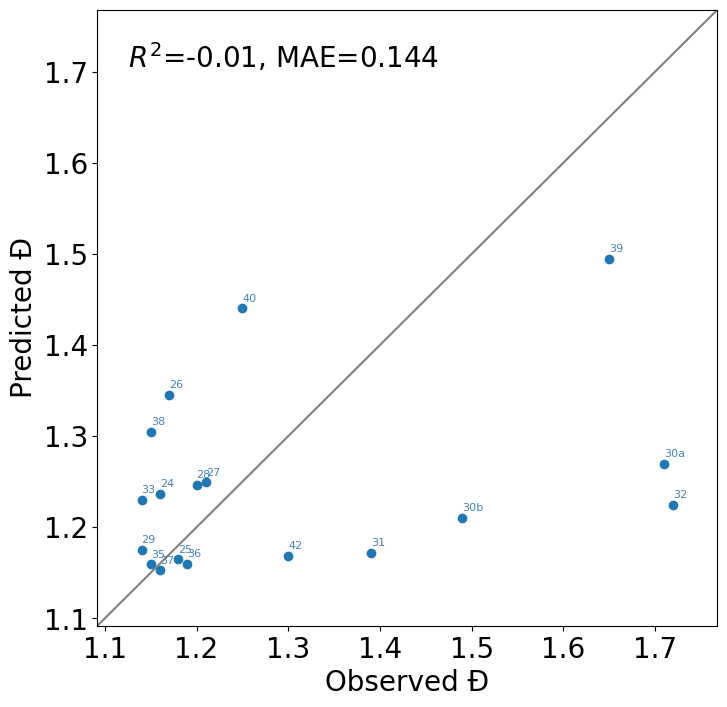

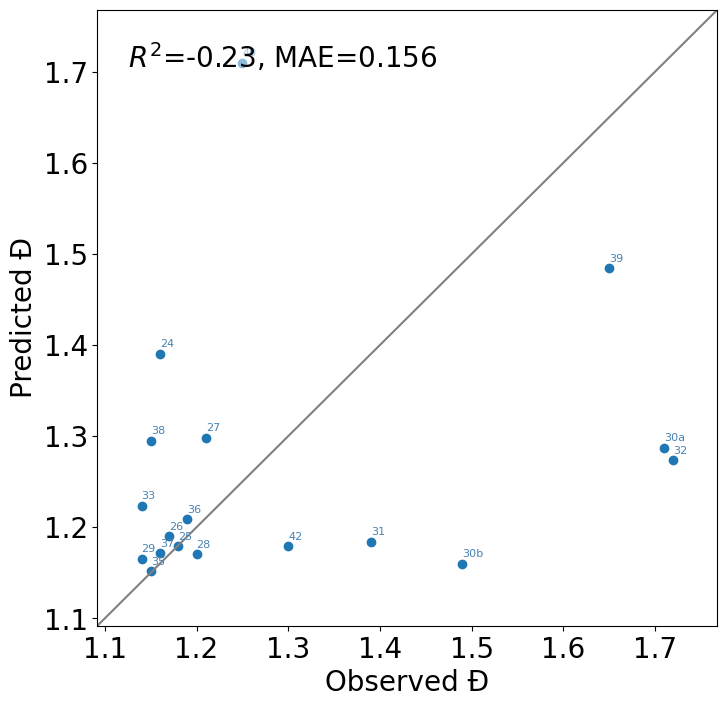

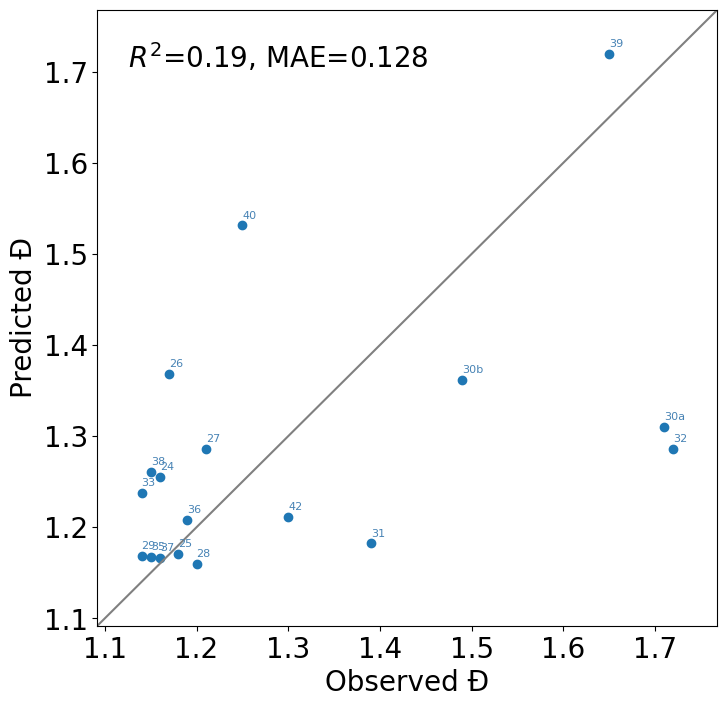

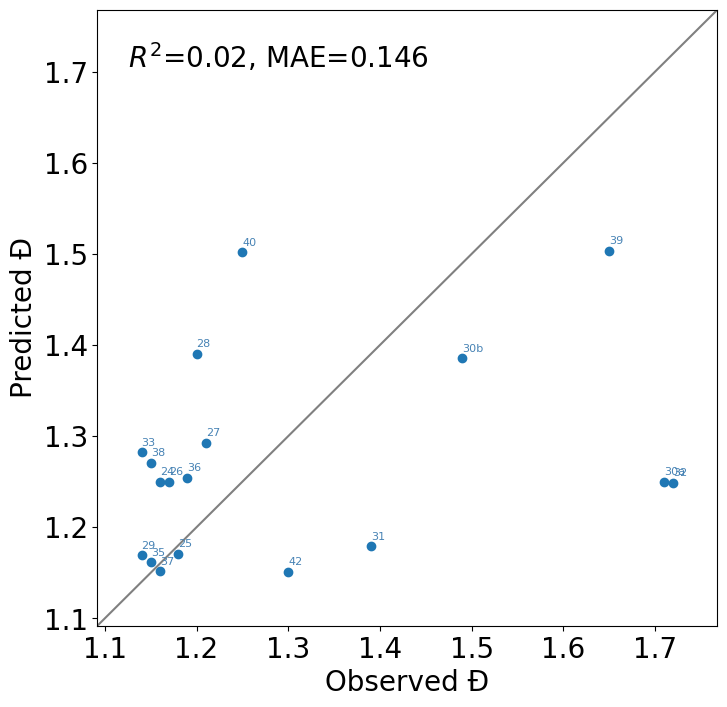

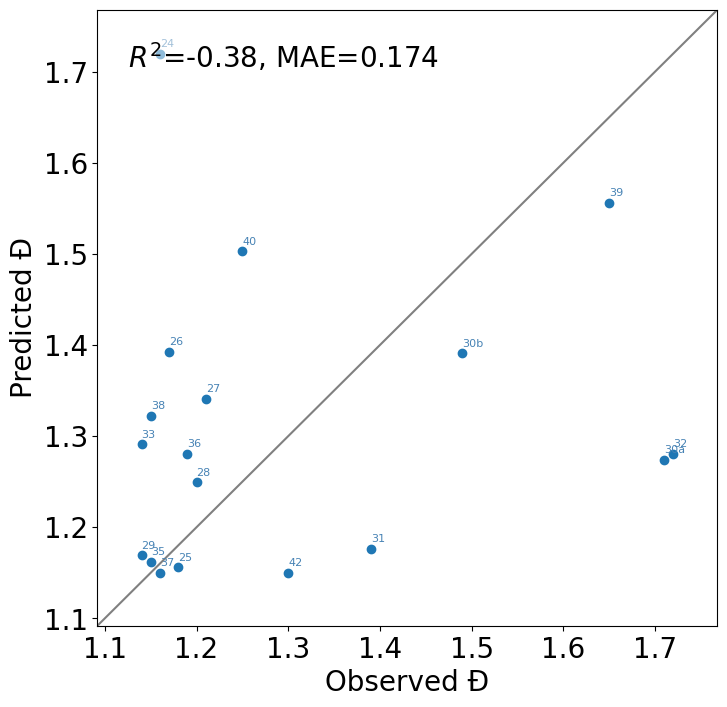

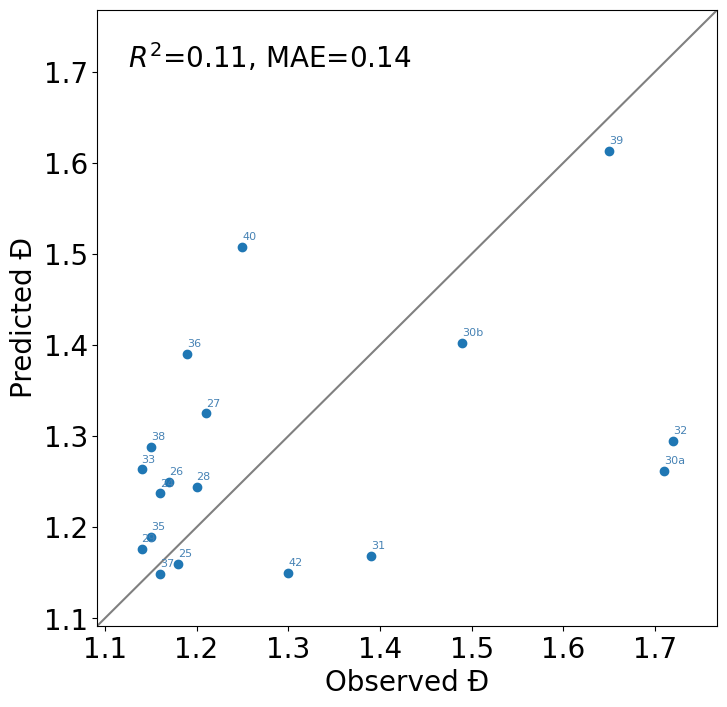

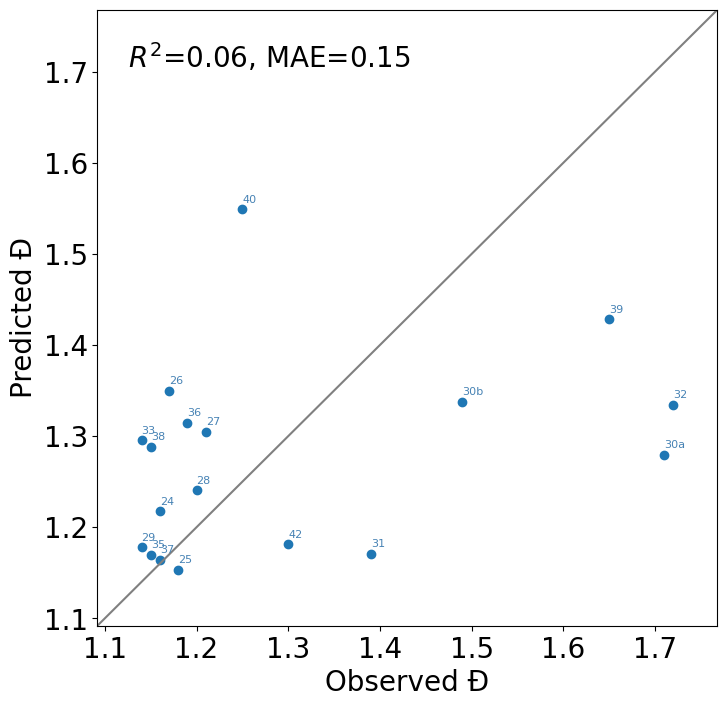

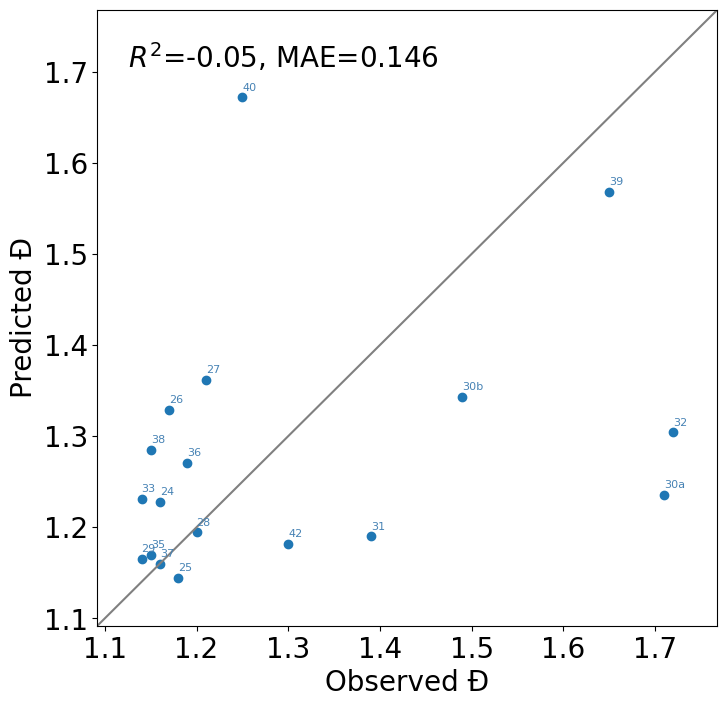

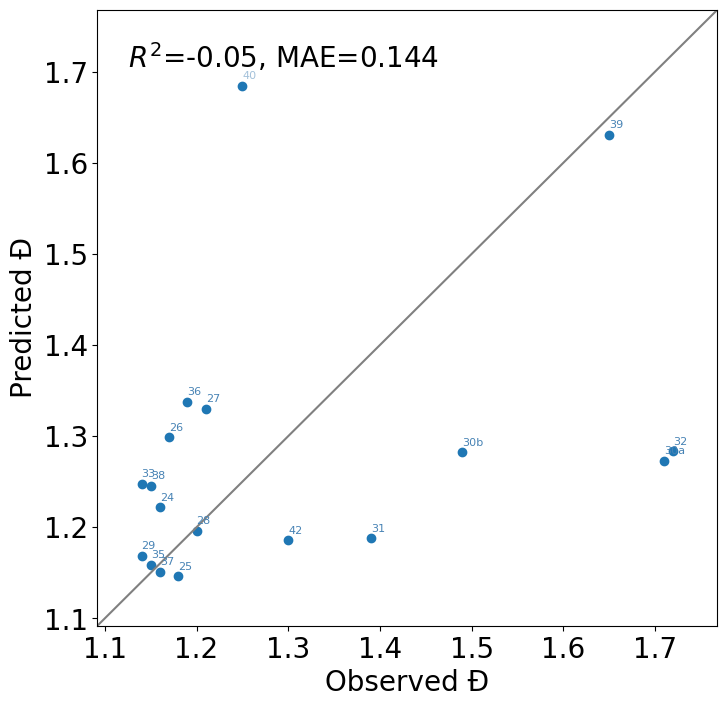

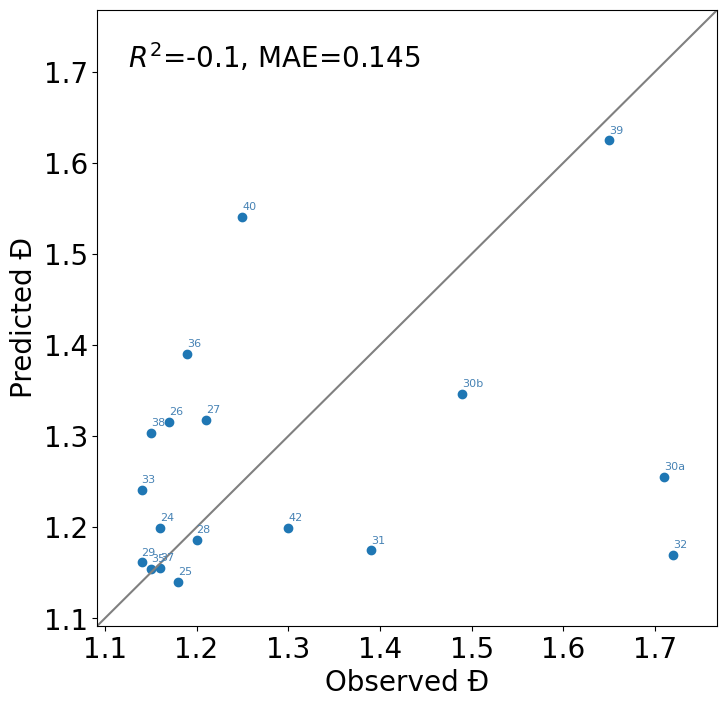

In [24]:
if __name__ == "__main__":
    # file & preprocessing
    try:     
        df_X = pd.read_excel("../data/XY/data_set_{}/data_set_{}_{}_descriptors.xlsx".format(data_set, data_set, descriptors), index_col = 0, sheet_name = monomer) #descriptors select
    except ValueError:
        print(f"Sheet '{monomer}' not found. Loading the first sheet instead.")
        df_X = pd.read_excel("../data/XY/data_set_{}/data_set_{}_{}_descriptors.xlsx".format(data_set, data_set, descriptors), index_col = 0)
        
    df_Y = pd.read_excel("../data/XY/data_set_{}/data_set_{}_SMILES&objective_function.xlsx".format(data_set, data_set), index_col = 0)
    
    df = pd.concat([df_X, df_Y], axis=1)
    
    df.index = df.index.astype("str")
    df.drop(["41"], axis=0, inplace=True) #Select the sample you want to use
    X = df.iloc[:, :len(df_X.columns)]
    y = np.log(df["{}_PDI".format(monomer)]-1) # St_PDI or nBA_PDI
    
    fold = len(df.index)
    kf = KFold(n_splits=fold, shuffle=True, random_state=rseed_cv)
    n_estimators = np.arange(1, 105, 5)
    params  = dict(n_estimators = n_estimators)
    scoring     = make_scorer(RMSE, greater_is_better = False)
    model = GridSearchCV(RandomForestRegressor(), param_grid=params, scoring=scoring, cv=fold-1)

       
    CV_results = pd.DataFrame(index = X.index, columns = ['inner_R2', 'pred_y', 'observed_y', "top10_features", "top10_coefficients"])
    
    for perc in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
        for ifold, (tridx, tsidx) in enumerate(kf.split(X, y)):
            try:
                Xtr, Xts = X.iloc[tridx], X.iloc[tsidx]
                ytr, yts = y.iloc[tridx], y.iloc[tsidx]
                
                Xtr, Xts = search_highly_correlated_variables_cv(Xtr, Xts, 0.8)
                Xtr, Xts = boruta_cv(Xtr, ytr, Xts, perc = perc, rseed_boruta = rseed_boruta) # select the best perc 
                
                #No standardization when using morganFP 
                scaler_X = StandardScaler()
                scaler_X.fit(Xtr)
                Xtr = pd.DataFrame(scaler_X.transform(Xtr), index = Xtr.index, columns = Xtr.columns)
                Xts = pd.DataFrame(scaler_X.transform(Xts), index = Xts.index, columns = Xts.columns)
            
                model.fit(Xtr, ytr)
                model_inner = RandomForestRegressor(n_estimators = model.best_params_['n_estimators'])
                model_inner.fit(Xtr, ytr)
                ytr_pred = model_inner.predict(Xtr)
                yts_pred = model_inner.predict(Xts)
                
                coefficients = model_inner.feature_importances_.ravel()
                top10_features = np.argsort(np.abs(coefficients))[::-1][:10].tolist()
                top10_coefficients = [round(num, 2) for num in coefficients[top10_features].tolist()]
                
                CV_results.loc[Xts.index, "inner_R2"] = r2_score(np.exp(ytr) + 1, np.exp(ytr_pred) + 1)
                CV_results.loc[Xts.index, 'pred_y'] = np.exp(yts_pred) + 1
                CV_results.loc[Xts.index, 'observed_y'] = np.exp(yts) + 1
                CV_results.loc[Xts.index, 'top10_features'] = str(top10_features)
                CV_results.loc[Xts.index, 'top10_coefficients'] = str(top10_coefficients)
            
            except ValueError as e:
                print("An error occurred:", e, "Because the number of descriptors was set to zero by Boruta")    
                sys.exit(1)
        
        dirname = "../result/LOOCV/RF/"
        os.makedirs(dirname, exist_ok = True)
        
        CV_results.to_excel(dirname + "/{}_{}_RF_LOOCV_{}_perc={}_without_41.xlsx".format(data_set, monomer, descriptors, perc))
        
    
        # valuation index
        r2 = r2_score(CV_results['observed_y'], CV_results['pred_y'])
        MAE = mean_absolute_error(CV_results['observed_y'], CV_results['pred_y'])
        
        # # ## 予測結果の図示
        yyplot_k(CV_results['observed_y'], CV_results['pred_y'])
        
        for i, label in enumerate (CV_results.index):
            plt.annotate(label, xy = (CV_results['observed_y'][label], CV_results['pred_y'][label]), xytext=(0, 5),  # Adjust these values as needed
                textcoords='offset points',size =8, color = "steelblue")
            
        plt.text(0.05, 0.95, r"$R^2$={}, MAE={}".format(round(r2, 2), round(MAE, 3)), transform=plt.gca().transAxes,
                  verticalalignment='top', horizontalalignment='left',
                  bbox=dict(facecolor='white', edgecolor='none', alpha=0.5))
        
           
        plt.savefig(dirname + "/{}_{}_RF_LOOCV_{}_perc={}_without_41.jpg".format(data_set, monomer, descriptors, perc))